In [1]:
# apoio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [2]:
# carrega dataframe com discursos do PT e PSDB
dftr = pd.read_csv(r'F:\_Pesquisa\PosDoc\_Github\SupLearning\disc_classificacao.csv')
dftr.head()

,ano,discurso,PT,PSDB
0,2001,nilson mour recentemente mundial alimentacao a...,1,0
1,2001,coriolano sale salario minimo realmente enigma...,1,0
2,2001,saulo pedrosa existe ditado popular considero ...,1,0
3,2001,lim eminente nilson mourao promulgacao constit...,1,0
4,2001,agnaldo muniz consumidor amargara aumento luz ...,1,0


In [ ]:
#####################################################
# Primeiro teste do algoritmo de classificação

In [66]:
# define discursos do PT como os rótulos a serem aprendidos pelo algoritmo
y = dftr['PT']

# divide dataframe em dados de treinamento (2/3) e dados de teste (1/3)
X_train, X_test, y_train, y_test = train_test_split(dftr['discurso'], y, test_size=0.33, random_state=53)

# contagem de frequências 
count_vectorizer = CountVectorizer()
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

# algoritmo Multinomial de Naive Bayes 
alpha = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1,2,3,4,5,6,7,8,9,10,20]
acc_score = []
for i in alpha:
    nb_classifier = MultinomialNB(alpha = i)
    nb_classifier.fit(count_train, y_train)
    pred = nb_classifier.predict(count_test)
    acc_score.append(metrics.accuracy_score(y_test, pred))

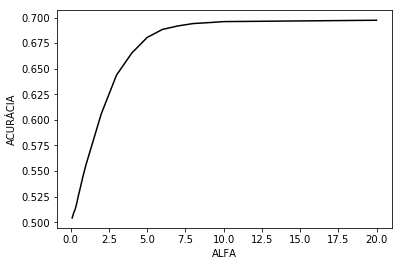

In [70]:
# variação da acurácia com alpha
plt.plot(alpha, acc_score, 'k')
plt.xlabel('ALFA')
plt.ylabel('ACURÁCIA')
plt.show()

In [32]:
metrics.confusion_matrix(y_test, pred, labels=[0,1])

array([[ 753, 4003],
       [2976, 7985]])

In [ ]:
#####################################################

In [74]:
#####################################################
# Segundo teste do algoritmo de classificação

In [21]:
# utiliza toda a base de PT e PSDB, de 2001 a 2015, 
# para treinamento, tomando PT como referência
X_train = dftr['discurso']
y_train = dftr['PT']

indano = []

for i in range(2003,2015+1):

    # carrega dataframe com discursos da coalizão
    dfts = pd.read_csv(r'F:\_Pesquisa\PosDoc\_Github\SupLearning\coalizao_' + str(i) + '.csv')
    dfts['y'] = 1
    
    # informa ao algoritmo que os discursos do 'partido' serão testados como discursos do PT
    X_test = dfts['discurso']
    y_test = dfts['y']

    # contagem de frequências 
    count_vectorizer = CountVectorizer()
    count_train = count_vectorizer.fit_transform(X_train.values)
    count_test = count_vectorizer.transform(X_test.values)

    # algoritmo Multinomial de Naive Bayes 
    nb_classifier = MultinomialNB(alpha = 8)
    nb_classifier.fit(count_train, y_train)
    pred = nb_classifier.predict(count_test)
    indano.append(metrics.accuracy_score(y_test, pred))
    
indano

[0.99309153713298792,
 0.99419210722263585,
 0.99058404377147224,
 0.99407894736842106,
 0.98954025784480659,
 0.98582925122463261,
 0.99012593016599881,
 0.99215481171548114,
 0.99359260914915815,
 0.95868175110673881,
 0.9821005917159763,
 0.99515151515151512,
 0.88269639065817407]

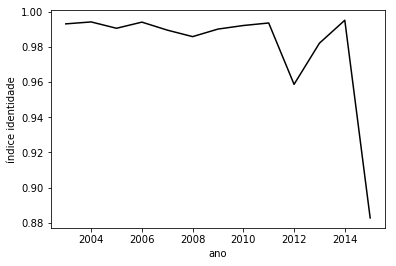

In [22]:
# variação da acurácia com alpha
plt.plot(range(2003,2015+1), indano, 'k')
plt.xlabel('ano')
plt.ylabel('índice identidade')
plt.show()